Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df['sex'].replace(['male','female'],[0,1],inplace=True)

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [5]:
df['smoker'].replace(['yes','no'],[0,1],inplace=True)

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,northwest,10600.54830
1334,18,1,31.920,0,1,northeast,2205.98080
1335,18,1,36.850,0,1,southeast,1629.83350
1336,21,1,25.800,0,1,southwest,2007.94500


In [7]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


<AxesSubplot:xlabel='region', ylabel='count'>

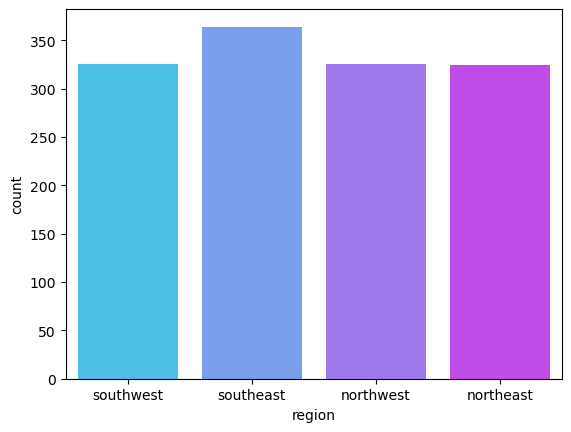

In [8]:
print(df['region'].value_counts())
sns.countplot(df['region'],palette="cool")

In [9]:
df['region'].replace(['southwest','southeast','northwest','northeast'],[0,1,2,3],inplace=True)

In [10]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,1,1629.83350
1336,21,1,25.800,0,1,0,2007.94500


In [11]:
df.shape

(1338, 7)

In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [13]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [14]:
df.ndim

2

In [15]:
df.min()

age           18.0000
sex            0.0000
bmi           15.9600
children       0.0000
smoker         0.0000
region         0.0000
charges     1121.8739
dtype: float64

In [16]:
df.max()

age            64.00000
sex             1.00000
bmi            53.13000
children        5.00000
smoker          1.00000
region          3.00000
charges     63770.42801
dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


Observation :- There is no null value in the data, still we will check with heatmap for the same

In [18]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Observation : -
1)Standard deviation of "age","bmi","children" is bit high hence the data is spreaded and there is possibilities of outliers.
    
2)mean is almost equalt to median so there is no skewness in data.

3)There is a bit difference in the 75% and max_value hence there is high possibility of outliers in the dataset.

In [19]:
df.sex.unique()

array([1, 0], dtype=int64)

In [20]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Observation : - As mentioned above there is no null value in the given data set still checking it with visualization(heatmap)

<AxesSubplot:>

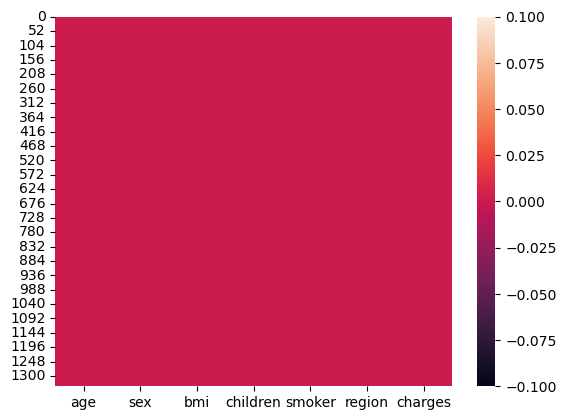

In [21]:
sns.heatmap(df.isnull())

Observation : - No null value confirmed by this heat map

Checking for correlations

In [22]:
dfcor=df.corr()
dfcor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,-0.016569,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,-0.002181,-0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,-0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,0.006208,1.000000


To understand the relationship between the 2 variables lets put this correlation data in heatmap

<AxesSubplot:>

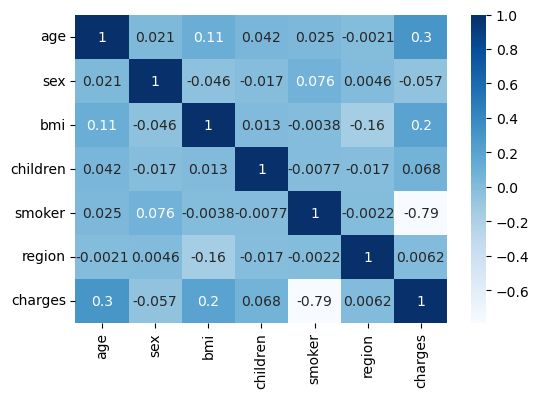

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

Observation : - Charges is correleated with bmi and age. There is no dropable value in the dataset columns

# Plotting the outliers

In [24]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

We will do the Multiple plotting so as to save time

age            AxesSubplot(0.125,0.53;0.110714x0.35)
sex         AxesSubplot(0.257857,0.53;0.110714x0.35)
bmi         AxesSubplot(0.390714,0.53;0.110714x0.35)
children    AxesSubplot(0.523571,0.53;0.110714x0.35)
smoker      AxesSubplot(0.656429,0.53;0.110714x0.35)
region      AxesSubplot(0.789286,0.53;0.110714x0.35)
charges        AxesSubplot(0.125,0.11;0.110714x0.35)
dtype: object

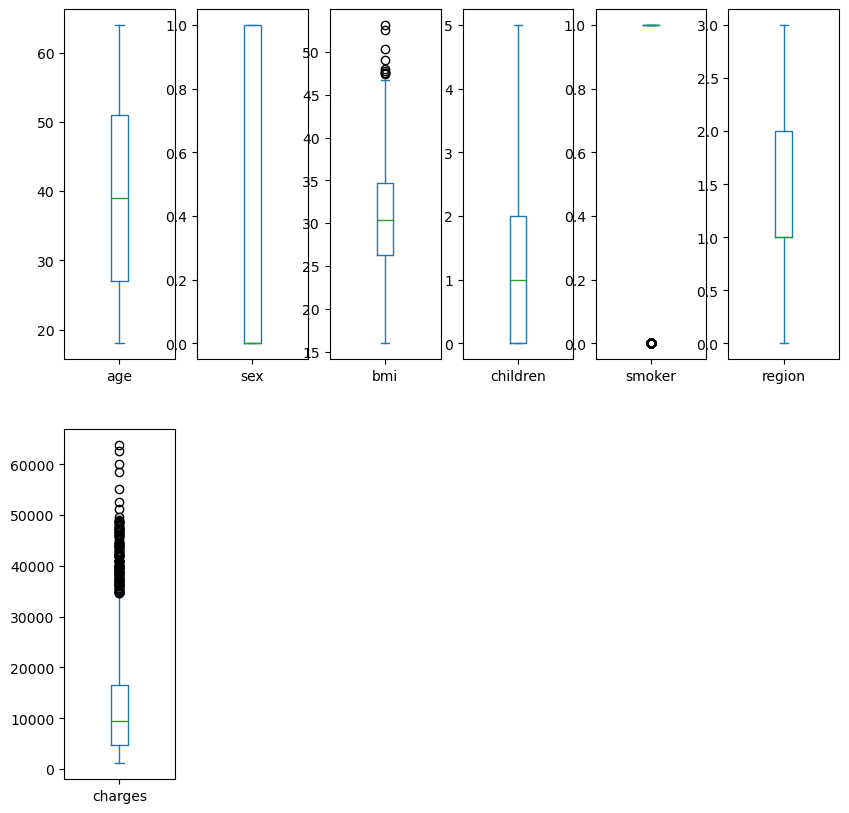

In [25]:
df.plot(kind='box',subplots=True,layout =(2,6),figsize=(10,10))

Observation : - As we can see in this boxplot there are few outliers present in "bmi" and "charges" columns

There is no skewness in the given datset still checking it graphically

<AxesSubplot:xlabel='age', ylabel='Density'>

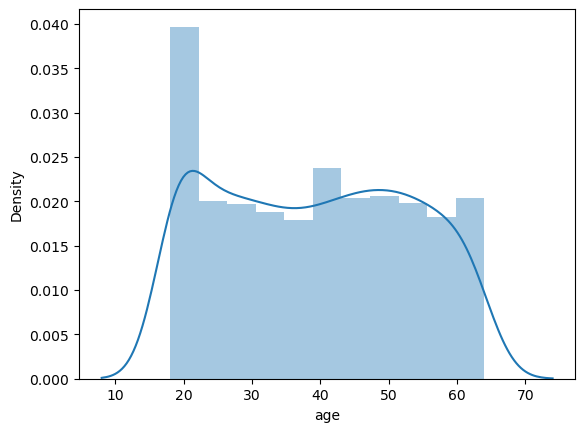

In [26]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

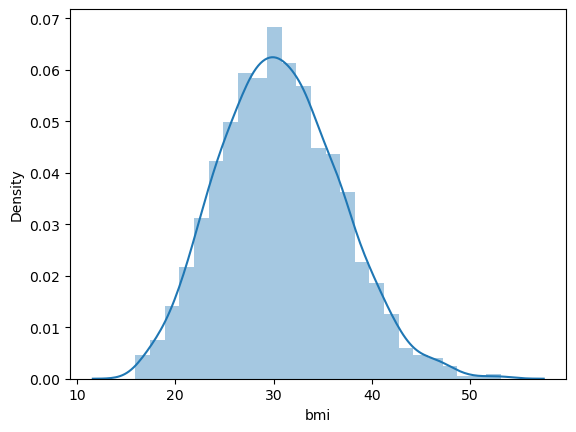

In [27]:
sns.distplot(df['bmi'])

In [28]:
df['sex'].replace(['male','female'],[0,1],inplace=True)

<AxesSubplot:xlabel='region', ylabel='Density'>

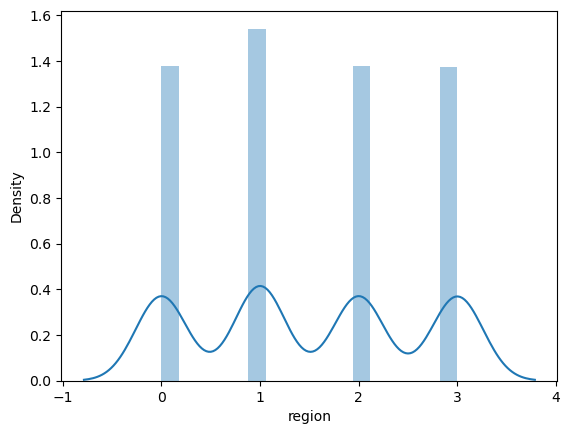

In [29]:
sns.distplot(df['region'])

<AxesSubplot:xlabel='charges', ylabel='Density'>

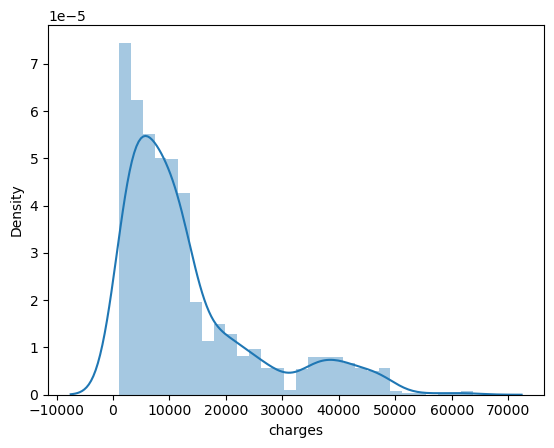

In [30]:
sns.distplot(df['charges'])

<AxesSubplot:xlabel='sex', ylabel='Density'>

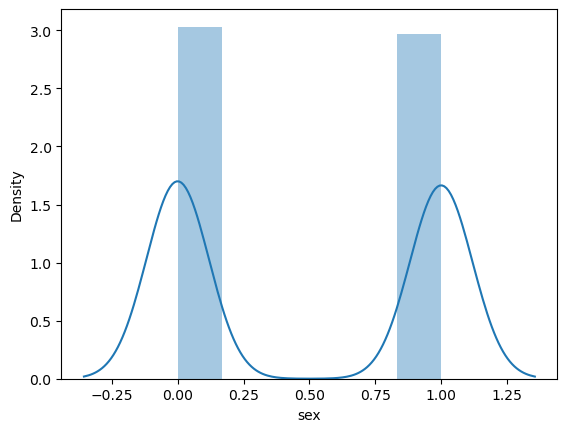

In [31]:
sns.distplot(df['sex'])

Observation : - Nominal skewness is observed, but its managable with the datset

# Removing the Outliers

In [32]:
from scipy.stats import zscore
out_features=df[['age','bmi','children','charges']]
z=np.abs(zscore(out_features))
z

,age,bmi,children,charges
0,1.438764,0.453320,0.908614,0.298584
1,1.509965,0.509621,0.078767,0.953689
2,0.797954,0.383307,1.580926,0.728675
3,0.441948,1.305531,0.908614,0.719843
4,0.513149,0.292556,0.908614,0.776802
...,...,...,...,...
1333,0.768473,0.050297,1.580926,0.220551
1334,1.509965,0.206139,0.908614,0.914002
1335,1.509965,1.014878,0.908614,0.961596
1336,1.296362,0.797813,0.908614,0.930362


In [33]:
threshold=3
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([2, 3, 2, 1, 2, 2, 2, 2, 3, 2, 3, 2, 3, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 3, 3, 2, 2, 3, 1], dtype=int64))


In [34]:
df_new=df[(z<3).all(axis=1)]
df_new

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,1,1629.83350
1336,21,1,25.800,0,1,0,2007.94500


In [57]:
df=df_new
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,1,1629.83350
1336,21,1,25.800,0,1,0,2007.94500


It is affordable loss of Data Now we will check IQR method

In [2]:
Q1=features.quantile(0.25)

Q3=features.quantile(0.75)

IQR=Q3- Q1

df2=df[~((df < (Q1-1.5 * IQR)) | (df>(Q3 + 1.5 * IQR))).any(axis=1)]

NameError: name 'features' is not defined

In [60]:
df2.shape

(1175, 7)

In [61]:
print("Data Loss Percentage after removing outliers with IQR method - ",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage after removing outliers with IQR method -  10.236822001527884


In [65]:
df.skew()

age         0.051340
sex         0.010708
bmi         0.191432
children    0.738119
smoker     -1.482731
region      0.023027
charges     1.437160
dtype: float64

it must be in the range of -0.5 to +0.5. Hence removing the skewness from smoker and charges columns

In [69]:
df['smoker']=np.cbrt(df['smoker'])

In [67]:
df['charges']=np.cbrt(df['charges'])

In [70]:
df.skew()

age         0.051340
sex         0.010708
bmi         0.191432
children    0.738119
smoker     -1.482731
region      0.023027
charges     0.481700
dtype: float64

In [71]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019253,0.118178,0.059100,0.029090,-0.003121,0.456015
sex,0.019253,1.000000,-0.042498,-0.014056,0.079058,0.003084,-0.029101
bmi,0.118178,-0.042498,1.000000,0.029916,0.005288,-0.160126,0.153914
children,0.059100,-0.014056,0.029916,1.000000,-0.028844,0.002976,0.151181
smoker,0.029090,0.079058,0.005288,-0.028844,1.000000,-0.003474,-0.725957
region,-0.003121,0.003084,-0.160126,0.002976,-0.003474,1.000000,0.031659
charges,0.456015,-0.029101,0.153914,0.151181,-0.725957,0.031659,1.000000


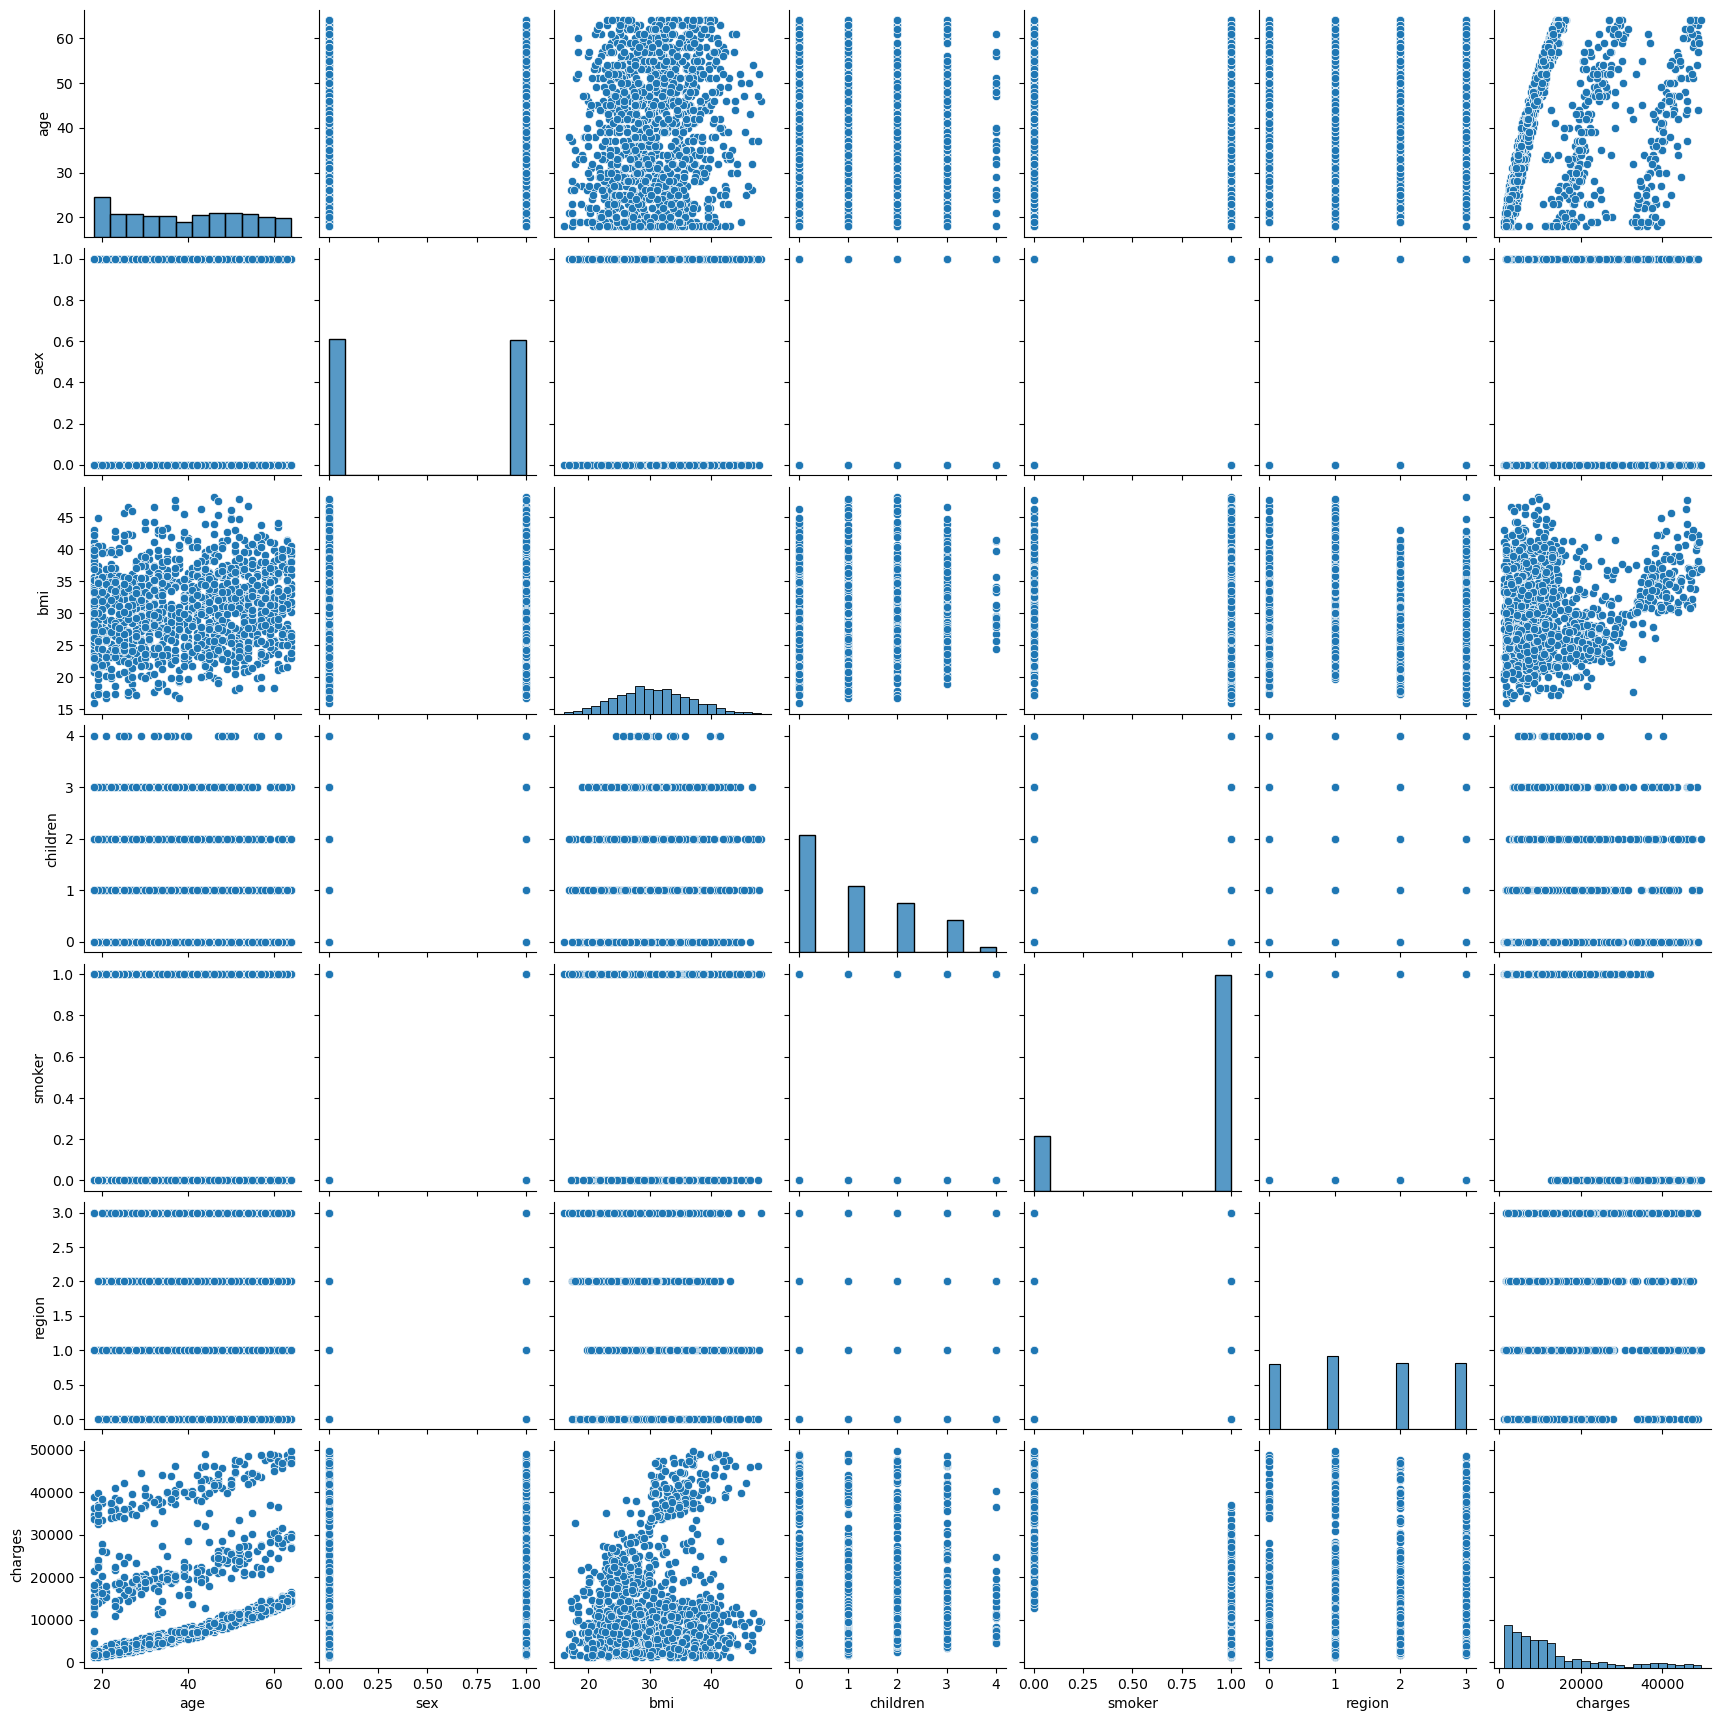

In [37]:
sns.pairplot(df)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns =x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.439063,1.005362,-0.449359,-0.929616,-1.984848,-1.352753
1,-1.510086,-0.994667,0.533391,-0.040093,0.503817,-0.447460
2,-0.799859,-0.994667,0.404478,1.738954,0.503817,-0.447460
3,-0.444746,-0.994667,-1.319101,-0.929616,0.503817,0.457833
4,-0.515769,-0.994667,-0.285288,-0.929616,0.503817,0.457833
...,...,...,...,...,...,...
1304,0.762639,-0.994667,0.064617,1.738954,0.503817,0.457833
1305,-1.510086,1.005362,0.223666,-0.929616,0.503817,1.363127
1306,-1.510086,1.005362,1.049041,-0.929616,0.503817,-0.447460
1307,-1.297018,1.005362,-0.800939,-0.929616,0.503817,-1.352753


VIF (for multicollinearity)

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,VIF values,Features
0,1.019082,age
1,1.008815,sex
2,1.043841,bmi
3,1.005176,children
4,1.007983,smoker
5,1.026656,region


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

Creating Train test Split

In [80]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.33,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("maximum r2 score is ",maxAccu, "on Random_state",maxRS)

maximum r2 score is  0.8083562041182162 on Random_state 27


In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.30,random_state=maxRS)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import Lasso,Ridge

In [83]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:', r2_score(y_test,pred_LR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_LR))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_LR))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.8163956888560486
R2_score on training data: 72.38854306117618
Mean Absolute Error :- 3779.430994123086
Mean_Squared_Error :-  25743369.30524331
Root Mean Square Error:- 5073.792398713541


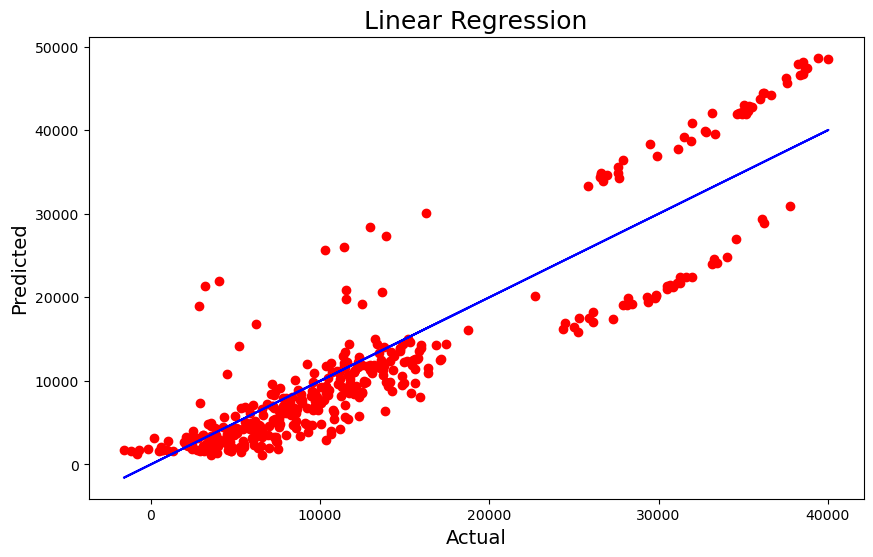

In [84]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

In [4]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:', r2_score(y_test,pred_RFR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_RFR))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_RFR))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_RFR)))

NameError: name 'x_train' is not defined

In [94]:
!pip install knn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for knn: filename=KNN-1.0.0-py3-none-any.whl size=3111 sha256=43aa7aa7cef08642c33413420ba355fb07be65d7612631730bd69cda41075754
  Stored in directory: c:\users\sahil\appdata\local\pip\cache\wheels\0e\28\19\500426a749f959c9ee8007e5b9dfe9f3eccb19e75e3f3bdfa9
Successfully built knn


In [5]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:', r2_score(y_test,pred_knn))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_knn))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_knn))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_knn)))

NameError: name 'KNN' is not defined

In [89]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:', r2_score(y_test,pred_GBR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_GBR))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_GBR))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.9179555628310215
R2_score on training data: 88.23247988431767
Mean Absolute Error :- 2084.7478973683515
Mean_Squared_Error :-  11503543.856472379
Root Mean Square Error:- 3391.6874644448562


In [92]:
!pip install lasso

In [93]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:', r2_score(y_test,pred_lsso))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_lasso))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_lasso))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_lasso)))

NameError: name 'Lasso' is not defined

In [96]:
!pip install ridge

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [31 lines of output]
  running egg_info
  creating C:\Users\Sahil\AppData\Local\Temp\pip-pip-egg-info-qc_7lwv7\ridge.egg-info
  writing C:\Users\Sahil\AppData\Local\Temp\pip-pip-egg-info-qc_7lwv7\ridge.egg-info\PKG-INFO
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Sahil\AppData\Local\Temp\pip-install-8ky6780w\ridge_cbc485f188ec4fad912dfca36c107330\setup.py", line 15, in <module>
      setup(
    File "D:\Software\Anaconda\lib\site-packages\setuptools\__init__.py", line 87, in setup
      return distutils.core.setup(**attrs)
    File "D:\Software\Anaconda\lib\site-packages\setuptools\_distutils\core.py", line 185, in setup
      return run_commands(dist)
    File "D:\Software\Anaconda\lib\site-packages\setuptools\_distutils\core.py", line 201, in run_commands
      di

In [100]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:', r2_score(y_test,pred_rd))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_rd))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_rd))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_rd)))

NameError: name 'Ridge' is not defined

In [99]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:', r2_score(y_test,pred_dtr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_dtr))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_dtr))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score: 0.7058556108357252
R2_score on training data: 100.0
Mean Absolute Error :- 2979.527872287532
Mean_Squared_Error :-  41242319.37769831
Root Mean Square Error:- 6422.018325861295


In [101]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_score:', r2_score(y_test,pred_svr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_svr))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_svr))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score: -0.05252288832379737
R2_score on training data: -9.666308602946883
Mean Absolute Error :- 8039.744449086717
Mean_Squared_Error :-  147575431.35845652
Root Mean Square Error:- 12148.062864442896


In [102]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2_score:', r2_score(y_test,pred_etr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :-', mean_absolute_error(y_test,pred_etr))
print('Mean_Squared_Error :- ', mean_squared_error (y_test,pred_etr))
print('Root Mean Square Error:-', np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_score: 0.8778960037542556
R2_score on training data: 100.0
Mean Absolute Error :- 2145.7242570849885
Mean_Squared_Error :-  17120340.20015873
Root Mean Square Error:- 4137.673283399588


In [103]:
from sklearn.model_selection import cross_val_score

In [105]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_LR)- score.mean())*100)

[0.76337332 0.71273583 0.78072916 0.73045788 0.76622267]
0.7507037701961409
Difference between R2 score and cross validation is :-  6.569191865990776


In [106]:
score1=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_RFR)- score.mean())*100)

[0.85216116 0.78219244 0.85079016 0.83462123 0.85240909]
0.8344348160662814


NameError: name 'pred_RFR' is not defined

In [107]:
score2=cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_svr)- score.mean())*100)

[-0.10950263 -0.10909093 -0.06727211 -0.09799719 -0.10077005]
-0.0969265818980622
Difference between R2 score and cross validation is :-  -80.32266585199382


In [108]:
score3=cross_val_score(etr,x,y,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_etr)- score.mean())*100)

[0.8377923  0.75892478 0.83701795 0.81318734 0.84183313]
0.8177511008891598
Difference between R2 score and cross validation is :-  12.71922335581147


In [109]:
score4=cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_dtr)- score.mean())*100)

[0.76715054 0.64700425 0.61648387 0.74560398 0.67279693]
0.689807916637067
Difference between R2 score and cross validation is :-  -4.484815936041564


In [110]:
score5=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation is :- ",(r2_score(y_test,pred_GBR)- score.mean())*100)

[0.87801961 0.80537503 0.88385392 0.84555856 0.8638385 ]
0.8553291219671693
Difference between R2 score and cross validation is :-  16.725179263488066


In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
param={'alpha' :[1.0,.05,.4,2],'fit_intercept':[True,False],
      'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],
      'positive':[False,True],
      'random_state' : [1,4,10,20]
      }
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

NameError: name 'Ridge' is not defined

Hence the Insurance cost is predicted accurately 